# This Project takes in historical Data points of weather in Ann Harbour and draws visualization on trends and differences
An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The following variables are describes as follows:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

<IPython.core.display.Javascript object>


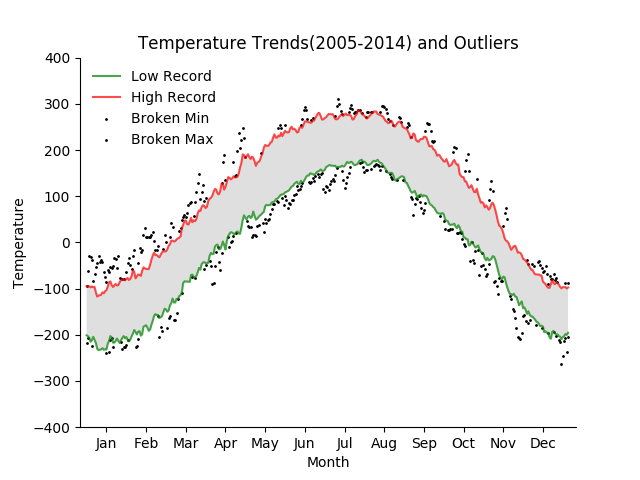

([<matplotlib.axis.XTick at 0x7f302e418cf8>,
 <a list of 12 Text xticklabel objects>)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df =pd.read_csv('data/C2A2_data/BinnedCsvs_d25/9bc594d0d6bf5fec16beb2afb02a3b859b7d804548c77d614b2a6b9b.csv')

df = df.sort_values(['ID','Date'])

df.sort_values(['ID','Date'])
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month-Date'] = df['Date'].apply(lambda x:x[5:])
df = df[df['Month-Date'] != '02-29']

temp_min_year = df[(df['Element']=='TMIN') & (df['Year'] != 2015)]
temp_max_year = df[(df['Element']=='TMAX') & (df['Year'] != 2015)]

df_min = df[df['Element']=='TMIN']
df_max = df[df['Element']=='TMAX']

temp_min = temp_min_year.groupby('Month-Date')['Data_Value'].agg({'Min_temp':np.mean})
temp_max = temp_max_year.groupby('Month-Date')['Data_Value'].agg({'Max_temp':np.mean})

year_15_min = df_min[df_min['Year']=='2015']
year_15_max = df_max[df_max['Year']=='2015']

temp_min_15 = year_15_min.groupby('Month-Date')['Data_Value'].agg({'Min_temp_15':np.mean})
temp_max_15 = year_15_max.groupby('Month-Date')['Data_Value'].agg({'Max_temp_15':np.mean})

temp_min = temp_min.reset_index()
temp_max = temp_max.reset_index()

temp_min_15 = temp_min_15.reset_index()
temp_max_15 = temp_max_15.reset_index()

broken_min = temp_min_15[temp_min_15['Min_temp_15'] < temp_min['Min_temp']].index.tolist()
broken_max = temp_max_15[temp_max_15['Max_temp_15'] > temp_max['Max_temp']].index.tolist()

plt.figure()
plt.plot(temp_min['Min_temp'],'g',label='Low Record',alpha=0.7)
plt.plot(temp_max['Max_temp'],'r',label='High Record',alpha=0.7)

plt.scatter(broken_min, temp_min_15['Min_temp_15'].iloc[broken_min],c='black',s=1,label='Broken Min')
plt.scatter(broken_max,temp_max_15['Max_temp_15'].iloc[broken_max],c='black',s=1,label='Broken Max')

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend(frameon=False)
plt.title('Temperature Trends(2005-2014) and Outliers')
plt.gca().fill_between(range(len(temp_min)),temp_min['Min_temp'],temp_max['Max_temp'],facecolor='grey',alpha=0.25)
plt.gca().axis([-5,370,-400,400])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Months)